In [1]:
import sys
sys.path.append('../../..')

# ChaskiNode: Distributed Node Communication and Management

The `ChaskiNode` class is designed to manage network communication between distributed nodes.
This class handles various network operations such as initiating connections, handling incoming requests,
and orchestrating network-wide actions like discovery and pairing of nodes based on shared subscriptions.

**Key Features:**  

 - **TCP and UDP Communication**: Supports both TCP and UDP protocols for reliable and timely message delivery.  
 - **Node Discovery and Pairing**: Handles discovery of other nodes and establishes connections based on subscriptions.  
 - **Ping and Latency Management**: Supports ping operations for measuring latency and maintaining connection health.  
 - **Subscription Management**: Manages subscribed topics and pairs nodes sharing common interests.  
 - **Keep-alive and Disconnection Handling**: Maintains active connections and handles disconnections gracefully.  

## Create node

To create a `ChaskiNode`, you need to instantiate it with the appropriate parameters. Here’s an example to guide you:

In [2]:
from chaski.node import ChaskiNode
import pickle

# This block initializes a ChaskiNode with specific parameters for network communication and management.
node = ChaskiNode(
    ip='127.0.0.1',  # The IP address for the node to bind to.
    port=65432,  # The port number for the node to listen on.
    serializer=pickle.dumps,  # Function to serialize data before sending.
    deserializer=pickle.loads,  # Function to deserialize received data.
    name='Node',  # The name for the node.
    subscriptions=['topic1', 'topic2'],  # List of topics the node is interested in.
    run=True,  # Flag to start the servers immediately on initialization.
    ttl=64,  # Time-to-live value for discovery messages.
    root=False,  # Flag to indicate if the node is a root node.
    max_connections=5,  # Maximum number of connections the node can handle.
    reconnections=32,  # Number of reconnection attempts if a connection is lost.
)

node

ChaskiNode@127.0.0.1:65432

The `ChaskiNode` will handle the network communication, manage the connections, and take care of aspects
like node discovery, pairing, and ping operations for latency measurement.

## Set connections between nodes

To establish connections between nodes, you can use the `connect` method of the `ChaskiNode` class.
This method allows a node to initiate a TCP connection to a specified peer node. Here’s an example:

In [3]:
from chaski.node import ChaskiNode

# Initialize three ChaskiNode instances with given IP addresses, names, and subscription topics.
node1 = ChaskiNode(
    ip='127.0.0.1',
    name='Node1',
    subscriptions=['A', 'B'],
)

node2 = ChaskiNode(
    ip='127.0.0.1',
    name='Node2',
    subscriptions=['B', 'C'],
)

node3 = ChaskiNode(
    ip='127.0.0.1',
    name='Node3',
    subscriptions=['C', 'D'],
)

The instantiation of the three ChaskiNode instances above does not use all the arguments shown in the earlier example.
Specifically, the instances `node1`, `node2`, and `node3` do not utilize the `port`, `serializer`, `deserializer`, `run`, `ttl`, `root`, `max_connections`, and `reconnections` arguments.
Here are some reasons why these arguments might not be used in this context:

  - **Port:** If not specified, the nodes may dynamically bind to available ports which are automatically chosen.
  - **Serializer and Deserializer:** If nodes are communicating using default methods, custom serializers and deserializers might not be necessary.
  - **Run:** Assuming the servers should start immediately, so run defaults to True.
  - **TTL:** The default TTL may be sufficient for the scope of communication.
  - **Root:** Nodes in this context might not need to designate a specific root node.
  - **Max Connections:** The default maximum might be sufficient for the network's needs.
  - **Reconnections:** Depending on the stability of connections, reconnections might not be a priority.

In [4]:
import asyncio

await asyncio.sleep(0.5)

Establish connections between the nodes where node2 and node3 connect to node1, enabling network communication between them.

In [5]:
await node2.connect(node1)
await node3.connect(node1)

In [6]:
await asyncio.sleep(0.5)

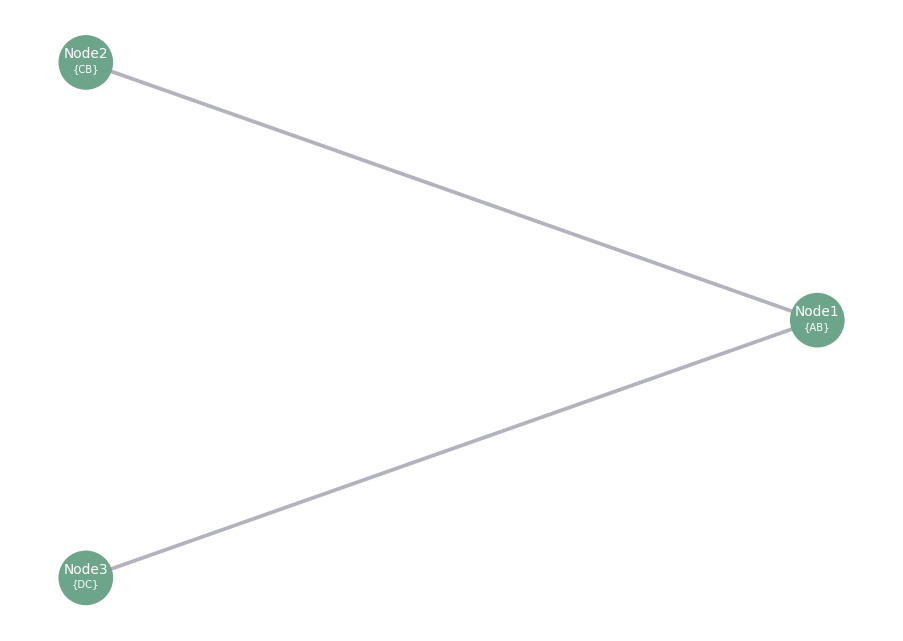

In [7]:
from chaski.utils.viz import display_graph

# This block visualizes the connections between node1, node2, and node3 using a graph representation.
display_graph([node1, node2, node3])

## Discovery feature

The `discovery` feature in `ChaskiNode` enables the automatic finding and pairing of nodes within the network.
It allows a node to discover other nodes that share common subscription topics and establishes connections with them.
This feature ensures that nodes can dynamically join the network, share information, and collaborate without manual configuration.

**Key Benefits:**

 - **Automatic Network Expansion:** Nodes can find and connect to each other based on shared subscriptions, allowing the network to grow automatically.
 - **Dynamic Pairing:** Nodes that share common interests are paired together, facilitating efficient communication and collaboration.
 - **Flexible Configuration:** The discovery process can be customized using parameters such as `on_pair` and `timeout` to control the behavior during the discovery phase.

In [8]:
node1 = ChaskiNode(
    name='Node1',
    subscriptions=['A'],
    root=True,
)

node2 = ChaskiNode(
    name='Node2',
    subscriptions=['B'],
)

node3 = ChaskiNode(
    name='Node3',
    subscriptions=['B'],
)

In [9]:
await asyncio.sleep(0.5)

Establish connections between node2 and node3 to node1

In [10]:
await node2.connect(node1)
await node3.connect(node1)

In [11]:
await asyncio.sleep(0.5)

Initiate the discovery process for node2 and node3, connecting them to node1 based on shared subscriptions without disconnecting after pairing.
await node2.discovery(on_pair='none', timeout=10)
await node3.discovery(on_pair='none', timeout=10)

### Parameters:
 - **node**: Optional. A reference to a ChaskiNode instance to start the discovery process from. If set to `None`, the discovery will be performed using the node itself.
 - **on_pair**: Optional. A flag determining the action to be taken when a peer is discovered. Can be 'none' (no action) or 'disconnect' (disconnect after pairing). Defaults to 'none'.
 - **timeout**: Optional. The maximum time in seconds to wait for the discovery process to complete before considering the node as paired. Defaults to 10 seconds.

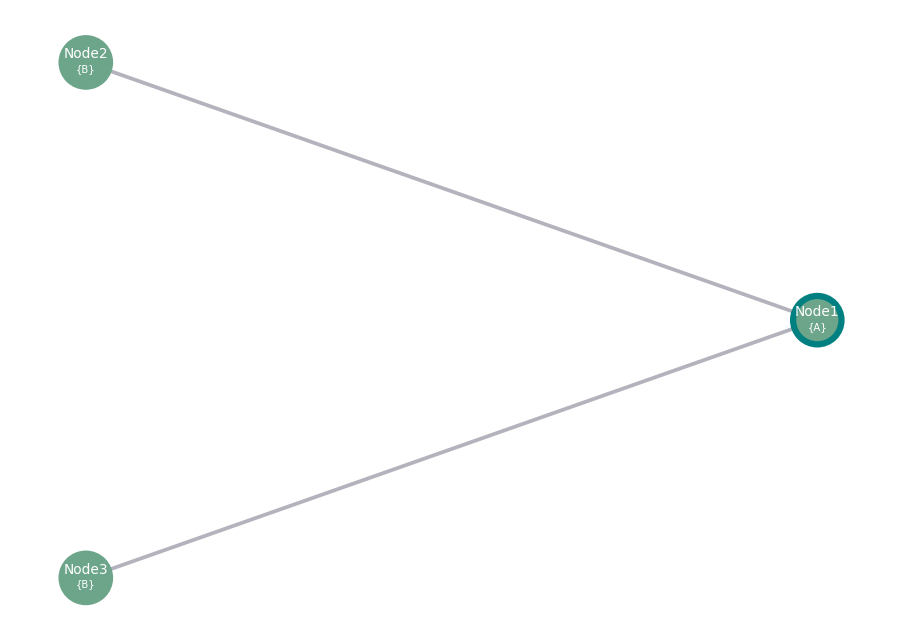

In [12]:
display_graph([node1, node2, node3])

In the next example, we'll explore using the `on_pair` argument with the option `disconnect`.

The `on_pair` argument can be set to `'disconnect'` to automatically disconnect nodes after they are paired.
This option is useful when you want to limit the number of active connections but still want nodes to discover
and briefly communicate with each other to exchange information or perform initial setups.

Let's demonstrate this with an example:

In [13]:
node1 = ChaskiNode(
    ip='127.0.0.1',
    name='Node1',
    subscriptions=['A'],
    root=True,
)

node2 = ChaskiNode(
    ip='127.0.0.1',
    name='Node2',
    subscriptions=['B'],
)

node3 = ChaskiNode(
    ip='127.0.0.1',
    name='Node3',
    subscriptions=['B'],
)

In [14]:
await asyncio.sleep(0.5)

Establish connections between node2 and node3 to node1

In [15]:
await node2.connect(node1)
await node3.connect(node1)

In [16]:
await asyncio.sleep(0.5)

This demonstrates the use of the 'on_pair' argument with the value 'disconnect', which will automatically
disconnect nodes after a successful pairing during discovery.

In [17]:
await node2.discovery(on_pair='disconnect')
await node3.discovery(on_pair='disconnect')

In [18]:
await asyncio.sleep(0.5)

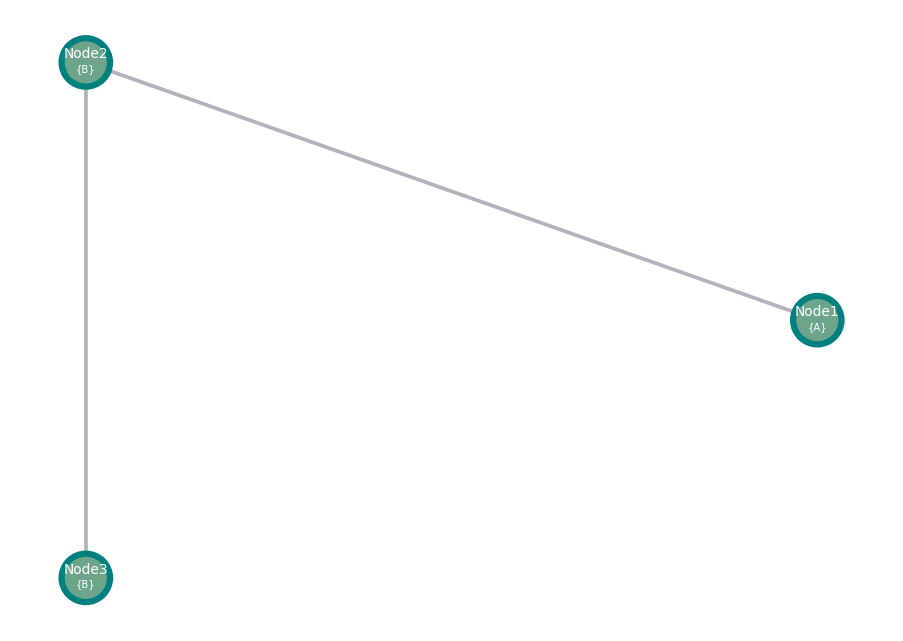

In [19]:
display_graph([node1, node2, node3])